In [1]:
import keras
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange
from keras.layers import Dropout
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.models import load_model

Using TensorFlow backend.


In [5]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\CNNs\league data"):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((256,256))
    data.append(np.array(x))
del paths

In [6]:
np.save('L1',data)

In [2]:
data = np.load('L1.npy')

In [3]:
low = np.load('L2.npy')

In [4]:
data = data/256
data.shape

(863, 256, 256, 3)

In [5]:
low = low/256
low.shape

(863, 64, 64, 3)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(low, data, test_size=0.25, shuffle=True, random_state=69)
del data
del low

In [7]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(2,2), input_shape=(64, 64, 3), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(128, kernel_size=(2,2), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(UpSampling2D())
model.add(Conv2D(128, kernel_size=(4,4), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(128, kernel_size=(5,5), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(UpSampling2D())
model.add(Conv2D(128, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Conv2D(128, kernel_size=(2,2), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(4,4), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(2,2), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(5,5), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Conv2D(3, kernel_size=(2,2), padding="same"))
model.add(LeakyReLU(alpha=0.2))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 128)       1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       65664     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)    

In [8]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

In [9]:
history = model.fit(x_train, y_train, epochs=20, batch_size=5, verbose=1,validation_data=(x_test, y_test),callbacks=callbacks_list)


Train on 647 samples, validate on 216 samples
Epoch 1/20
647/647 [==============================] - 68s 106ms/step - loss: 0.0272 - val_loss: 0.0104
Epoch 2/20
647/647 [==============================] - 64s 99ms/step - loss: 0.0102 - val_loss: 0.0087
Epoch 3/20
647/647 [==============================] - 61s 95ms/step - loss: 0.0087 - val_loss: 0.0079
Epoch 4/20
647/647 [==============================] - 65s 100ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 5/20
647/647 [==============================] - 63s 97ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 6/20
647/647 [==============================] - 62s 95ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 7/20
647/647 [==============================] - 62s 95ms/step - loss: 0.0074 - val_loss: 0.0068
Epoch 8/20
647/647 [==============================] - 63s 97ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 9/20
647/647 [==============================] - 62s 95ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 10/20
647/647 [============

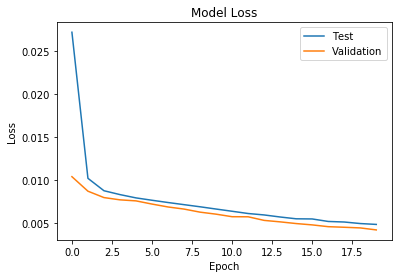

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [11]:
model.save('DLSS League.h5')

In [2]:
model = load_model('DLSS League.h5')

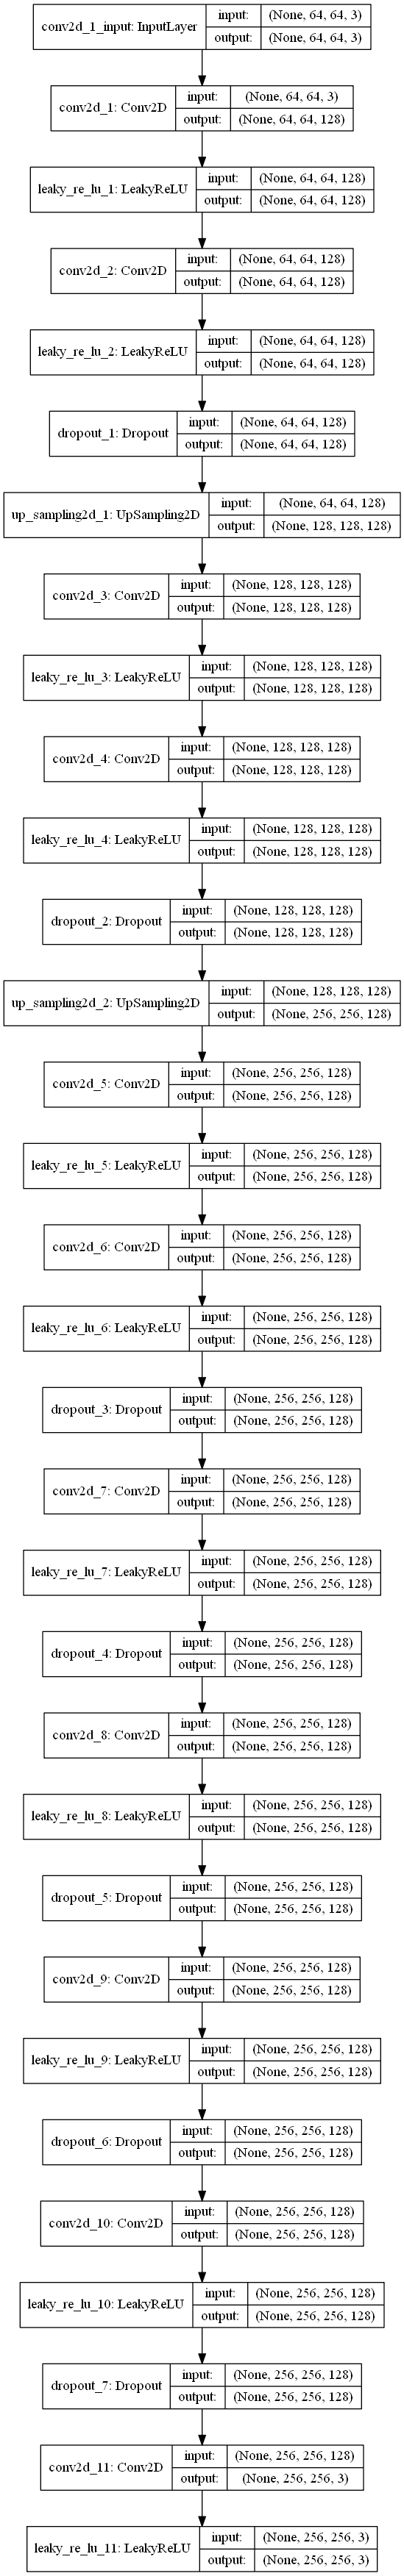

In [3]:
from keras.utils import plot_model
import pydot
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True,expand_nested=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


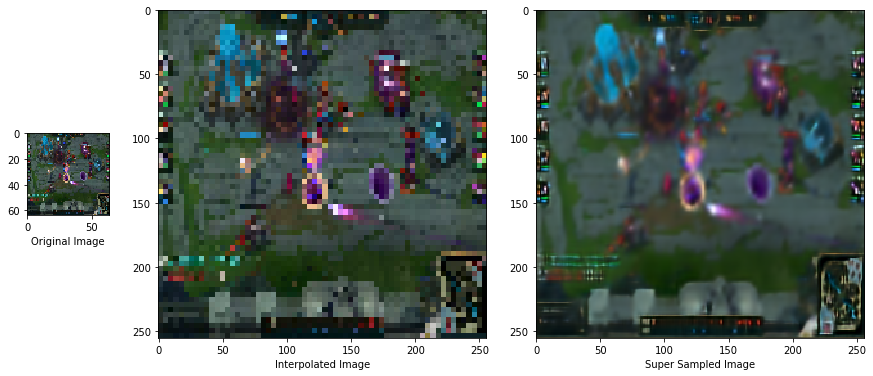

In [8]:
#select image
img = Image.open(r'D:\DF\workspace\convert\00142.png')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,4,4]})
axarr[0].set_xlabel('Original Image', fontsize=10)
axarr[1].set_xlabel('Interpolated Image', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image', fontsize=10)

#original image
x = img.resize((64,64))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,64,64,3) / 256
result = np.array(model.predict_on_batch(x))*256
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


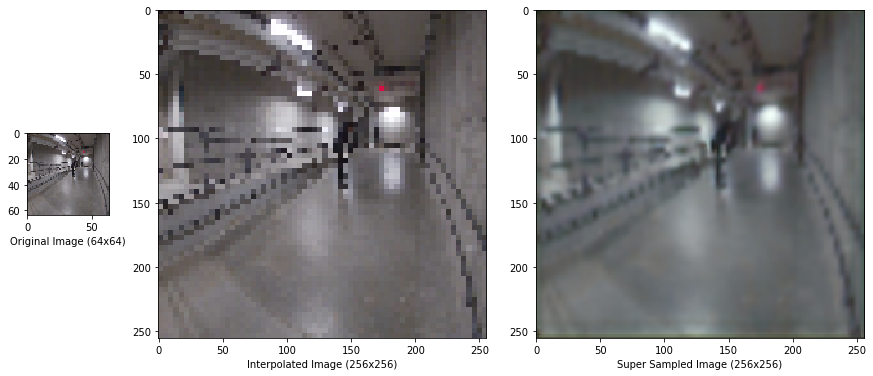

In [17]:
#select image
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\data\00071.png')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,4,4]})
axarr[0].set_xlabel('Original Image (64x64)', fontsize=10)
axarr[1].set_xlabel('Interpolated Image (256x256)', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image (256x256)', fontsize=10)

#original image
x = img.resize((64,64))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,64,64,3)/256
result = np.array(model.predict_on_batch(x))*256
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)

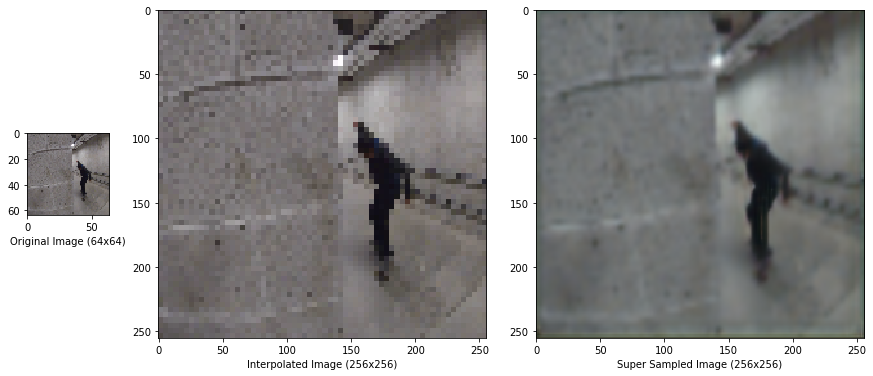

In [18]:
#select image
img = Image.open(r'C:\Users\Vee\Desktop\python\CNNs\data\00160.png')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,4,4]})
axarr[0].set_xlabel('Original Image (64x64)', fontsize=10)
axarr[1].set_xlabel('Interpolated Image (256x256)', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image (256x256)', fontsize=10)

#original image
x = img.resize((64,64))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,64,64,3)/256
result = np.array(model.predict_on_batch(x))*256
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


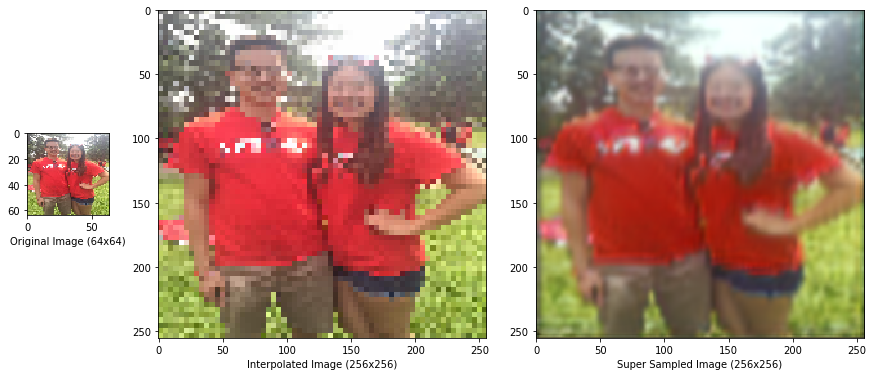

In [5]:
#select image
img = Image.open(r'E:\Pictures\13312779_1208254105871669_113482208285513871_n.jpg')

#create plot
f, axarr = plt.subplots(1,3,figsize=(15,15),gridspec_kw={'width_ratios': [1,4,4]})
axarr[0].set_xlabel('Original Image (64x64)', fontsize=10)
axarr[1].set_xlabel('Interpolated Image (256x256)', fontsize=10)
axarr[2].set_xlabel('Super Sampled Image (256x256)', fontsize=10)

#original image
x = img.resize((64,64))
#interpolated (resized) image
y = x.resize((256,256))
#plotting first two images
x = np.array(x)
y = np.array(y)
axarr[0].imshow(x)
axarr[1].imshow(y)
#plotting super sampled image
x = x.reshape(1,64,64,3)/256
result = np.array(model.predict_on_batch(x))*256
result = result.reshape(256,256,3)
result = result.astype(int)
axarr[2].imshow(result)